<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/project_cuoi_ky_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo set data (chưa split)

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [ ]:
folder='/content/drive/MyDrive/tonghop_cloth/'

In [ ]:

photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('glove'):
    output=1.0
  if file.startswith('hat'):
    output=2.0
  if file.startswith('pant'):
    output=3.0
  if file.startswith('shirt'):
    output=4.0
  if file.startswith('watch'):
    output= 5.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/cloth_photo.npy',photos)
save('/content/drive/MyDrive/cloth_label.npy',labels)

In [ ]:
photos.shape

(727, 100, 100, 3)

In [ ]:
labels.shape

(727,)

split data thành 70% train, 30% test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.5, train_size=0.5)
#test_x, test_y = train_test_split(photos,labels, test_size=0.3)

In [ ]:
train_x.shape

(363, 100, 100, 3)

In [ ]:
test_x.shape

(364, 100, 100, 3)

scale lại data

In [ ]:
#train_x = train_x.reshape([866,100,100,3])
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
#test_x = test_x.reshape([217,100,100,3])
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(train_y) #hot encoding
y_test = to_categorical(test_y)

In [ ]:
train_x.shape

(363, 100, 100, 3)

In [ ]:
y_train.shape

(363, 6)

tạo mô hình CNN

In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 6

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

ANN


In [ ]:
model.add(Dense(300,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=100,epochs=50,verbose=1)

#IMPROVE THE DATASET
# from keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
#     rescale=1./255,
# 	width_shift_range=0.2,
#     height_shift_range=0.2,
# 	horizontal_flip=True,
#     brightness_range=[0.2,1.5], fill_mode="nearest",validation_split=0.3)

# train = model.fit_generator(aug.flow(train_x, y_train, batch_size=100),
#                                epochs=100,
#                                validation_data=aug.flow(test_x,y_test,
#                                batch_size=len(test_x)))
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
4/4 [==============================] - 10s 182ms/step - loss: 4.4660 - accuracy: 0.1901
Epoch 2/50
4/4 [==============================] - 0s 36ms/step - loss: 1.7189 - accuracy: 0.2893
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 1.5422 - accuracy: 0.3085
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 1.3850 - accuracy: 0.3471
Epoch 5/50
4/4 [==============================] - 0s 36ms/step - loss: 1.2260 - accuracy: 0.5455
Epoch 6/50
4/4 [==============================] - 0s 36ms/step - loss: 1.0350 - accuracy: 0.6061
Epoch 7/50
4/4 [==============================] - 0s 36ms/step - loss: 0.8369 - accuracy: 0.6997
Epoch 8/50
4/4 [==============================] - 0s 35ms/step - loss: 0.8523 - accuracy: 0.6749
Epoch 9/50
4/4 [==============================] - 0s 35ms/step - loss: 0.7197 - accuracy: 0.7107
Epoch 10/50
4/4 [==============================] - 0s 35ms/step - loss: 0.6653 - accuracy: 0.7355
Epoch 11/50
4/4 [==========

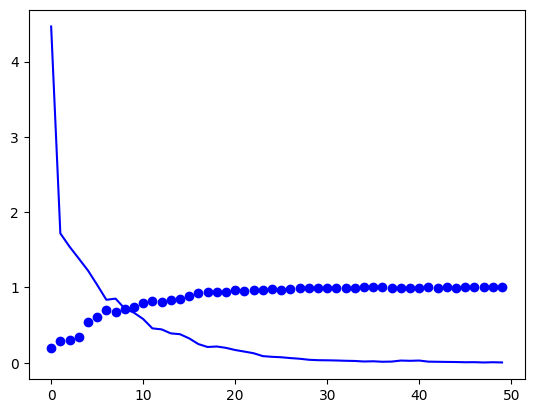

In [ ]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/cloth_detection.h5')

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/cloth_detection.h5')

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = '/content/drive/MyDrive/cloth_test'
for i in listdir(url):
  img = load_img(url + '/' + i, target_size = (100,100))
  imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float32')
  img = img/255
  a = model1.predict(img).argmax()
  class_name = ['glove', 'hat', 'pant', 'shirt', 'watch']
  print(class_name[a-1])
  plt.show()